In [2]:
import numpy as np
import pandas as pd
# Series的字符串表现形式为：索引在左边，值在右边。
s = pd.Series([1, 3, 6, np.nan, 44, 1])
print(s)
dates = pd.date_range('20180101', periods=6)
# 可将DataFrame看成由Series组成的大字典
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=['a','b','c','d'])
print(df)
print(df['a'])
print(df.columns)
print(df.index)

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64
                   a         b         c         d
2018-01-01 -0.692959 -0.156818  0.596290 -1.656095
2018-01-02 -0.441964 -0.810513 -0.302736  0.450830
2018-01-03  0.078990  0.404114  2.218898 -0.590595
2018-01-04  0.318015  0.320813  0.424236 -0.012531
2018-01-05 -0.861000  1.864017 -0.778539  1.513648
2018-01-06 -1.203254  0.447806 -0.203740  0.905883
2018-01-01   -0.692959
2018-01-02   -0.441964
2018-01-03    0.078990
2018-01-04    0.318015
2018-01-05   -0.861000
2018-01-06   -1.203254
Freq: D, Name: a, dtype: float64
Index(['a', 'b', 'c', 'd'], dtype='object')
DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')


In [3]:
df1 = pd.DataFrame({'A':1., 'B':pd.Timestamp('20180201'),
                    'C':pd.Series(1, index=list(range(4)), dtype='float32'), 
                    'D':np.array([3]*4,dtype='int32'), 
                    'E':pd.Categorical(["test", "train","test", "train"]), 'F':'foo'})
print(df1)
print(df1.describe())
# describe()作为数据的简单描述
print(df1.sort_index(axis=1, ascending=False))
print(df1.sort_values(by='B'))

     A          B    C  D      E    F
0  1.0 2018-02-01  1.0  3   test  foo
1  1.0 2018-02-01  1.0  3  train  foo
2  1.0 2018-02-01  1.0  3   test  foo
3  1.0 2018-02-01  1.0  3  train  foo
         A    C    D
count  4.0  4.0  4.0
mean   1.0  1.0  3.0
std    0.0  0.0  0.0
min    1.0  1.0  3.0
25%    1.0  1.0  3.0
50%    1.0  1.0  3.0
75%    1.0  1.0  3.0
max    1.0  1.0  3.0
     F      E  D    C          B    A
0  foo   test  3  1.0 2018-02-01  1.0
1  foo  train  3  1.0 2018-02-01  1.0
2  foo   test  3  1.0 2018-02-01  1.0
3  foo  train  3  1.0 2018-02-01  1.0
     A          B    C  D      E    F
0  1.0 2018-02-01  1.0  3   test  foo
1  1.0 2018-02-01  1.0  3  train  foo
2  1.0 2018-02-01  1.0  3   test  foo
3  1.0 2018-02-01  1.0  3  train  foo


In [4]:
# selecet data
dates = pd.date_range('20180101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)), index=dates, columns=['A', 'B', 'C', 'D'])
print(df)
# 选择某一列
print(df['A'])
# 选择几行
print(df[0:3])
# 通过标签选择某一行的数据
print(df.loc['20180102'])
# 选择某几列的数据
print(df.loc[:, ['A', 'B']])
# 同样可以根据位置进行选择iloc
print(df.iloc[3,1])
print(df.iloc[[1,3,5], 1:3])
# 混合选择ix
print(df.ix[:3, ['A', 'C']])
print(df[df.A>8])

# 修改数据
df.iloc[2, 2] = 1111
df.loc['20180102', 'B'] = 2222
df.B[df.A>4] = 0
df['F'] = np.nan

#  添加数据
df['E'] = pd.Series([1,2,3,4,5,6], index = pd.date_range('20180101', periods=6))

             A   B   C   D
2018-01-01   0   1   2   3
2018-01-02   4   5   6   7
2018-01-03   8   9  10  11
2018-01-04  12  13  14  15
2018-01-05  16  17  18  19
2018-01-06  20  21  22  23
2018-01-01     0
2018-01-02     4
2018-01-03     8
2018-01-04    12
2018-01-05    16
2018-01-06    20
Freq: D, Name: A, dtype: int64
            A  B   C   D
2018-01-01  0  1   2   3
2018-01-02  4  5   6   7
2018-01-03  8  9  10  11
A    4
B    5
C    6
D    7
Name: 2018-01-02 00:00:00, dtype: int64
             A   B
2018-01-01   0   1
2018-01-02   4   5
2018-01-03   8   9
2018-01-04  12  13
2018-01-05  16  17
2018-01-06  20  21
13
             B   C
2018-01-02   5   6
2018-01-04  13  14
2018-01-06  21  22
            A   C
2018-01-01  0   2
2018-01-02  4   6
2018-01-03  8  10
             A   B   C   D
2018-01-04  12  13  14  15
2018-01-05  16  17  18  19
2018-01-06  20  21  22  23


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [5]:
# Pandas 处理缺失数据
dates = pd.date_range('20180101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)), index=dates, columns=['A', 'B', 'C', 'D'])
print(df)
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan
df1 = df.dropna(axis=0, how='any')
# axis=0:对行进行操作, axis=1:对列进行操作; how='any':只要存在NaN就去掉, how='all':必须全部是NaN才去掉
print(df1)
# 将NaN替换为其他的数
df2 = df.fillna(value=0)
print(df2)
# 判断是否由缺失数据NaN，如果有，表示为True
print(df.isnull())

             A   B   C   D
2018-01-01   0   1   2   3
2018-01-02   4   5   6   7
2018-01-03   8   9  10  11
2018-01-04  12  13  14  15
2018-01-05  16  17  18  19
2018-01-06  20  21  22  23
             A     B     C   D
2018-01-03   8   9.0  10.0  11
2018-01-04  12  13.0  14.0  15
2018-01-05  16  17.0  18.0  19
2018-01-06  20  21.0  22.0  23
             A     B     C   D
2018-01-01   0   0.0   2.0   3
2018-01-02   4   5.0   0.0   7
2018-01-03   8   9.0  10.0  11
2018-01-04  12  13.0  14.0  15
2018-01-05  16  17.0  18.0  19
2018-01-06  20  21.0  22.0  23
                A      B      C      D
2018-01-01  False   True  False  False
2018-01-02  False  False   True  False
2018-01-03  False  False  False  False
2018-01-04  False  False  False  False
2018-01-05  False  False  False  False
2018-01-06  False  False  False  False


In [6]:
'''
Pandas可读取很多格式的文件， 包括CSV, TEXT, SAS等等
data = pd.read_csv('students.csv', encoding='utf8')
data.to_pickle('Students.pickle') 
'''
# 
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a', 'b', 'c', 'd'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a', 'b', 'c', 'd'])
# 纵向合并
res = pd.concat([df1, df2, df3], axis=0)
print(res)
# 忽略index
res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
print(res)
# join 
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a', 'b', 'c', 'd'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a', 'b', 'c', 'd'], index=[2,3,4])
res1 = pd.concat([df1, df2], axis=0, join='outer')
print(res1)
res2 = pd.concat([df1, df2], axis=0, join='inner', ignore_index=True)
print(res2) 

res3 = pd.concat([df1, df2], axis=1,join_axes=[df1.index])
# 按照df1.index进行合并
print(res3)
# 添加数据
s1 = pd.DataFrame(np.ones((3,4))*0, columns=['a', 'b', 'c', 'd'])
s2 = pd.Series([1,2,3,4], index=['a', 'b', 'c', 'd'])
res4 = s1.append(s2, ignore_index=True)
print(res4)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0
     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
     a    b    c    d    a    b    c    d
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  

In [7]:
# merge concat类似，但主要用于两组有key column的数据，统一索引的数据，通常也被用于DataBase的处理中
left = pd.DataFrame({'key':['K0', 'K1', 'K2', 'K3'], 'A':['A0', 'A1', 'A2', 'A3'], 
                      'B':['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key':['K0', 'K1', 'K2', 'K3'], 'C':['C0', 'C1', 'C2', 'C3'], 
                      'D':['D0', 'D1', 'D2', 'D3']})
print(left)
print(right)
# 依据key column合并
result = pd.merge(left, right, on='key')
print(result)
# 依据两组key合并
left = pd.DataFrame({'key1':['K0', 'K0', 'K1', 'K2'], 'key2':['K0', 'K1', 'K0', 'K1'], 
                     'A':['A0', 'A1', 'A2', 'A3'], 'B':['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1':['K0', 'K1', 'K1', 'K2'], 'key2':['K0', 'K0', 'K0', 'K0'],
                      'C':['C0', 'C1', 'C2', 'C3'], 'D':['D0', 'D1', 'D2', 'D3']})
print(left)
print(right)
result1 = pd.merge(left, right, on=['key1','key2'], how='inner')
print(result1)
result2 = pd.merge(left, right, on=['key1','key2'], how='outer')
print(result2)
result3 = pd.merge(left, right, on=['key1','key2'], how='left')
print(result3)
result4 = pd.merge(left, right, on=['key1','key2'], how='right')
print(result4)

# indicator=True会将合并的记录放在新的一列。
df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
print(df1)
print(df2)
# 依据col1进行合并，并启用indicator=True，最后打印出
res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
print(res)
# 自定indicator column的名称，并打印出
res = pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')
print(res)
# 依据index合并 

left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])
print(left)
print(right)
#依据左右资料集的index进行合并，how='outer',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
print(res)

#依据左右资料集的index进行合并，how='inner',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')
print(res)

# 解决overlapping的问题 
#定义资料集
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})

#使用suffixes解决overlapping的问题
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')
print(res)

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3
    C   D key
0  C0  D0  K0
1  C1  D1  K1
2  C2  D2  K2
3  C3  D3  K3
    A   B key   C   D
0  A0  B0  K0  C0  D0
1  A1  B1  K1  C1  D1
2  A2  B2  K2  C2  D2
3  A3  B3  K3  C3  D3
    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1
    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K1   K0
3  C3  D3   K2   K0
    A   B key1 key2   C   D
0  A0  B0   K0   K0  C0  D0
1  A2  B2   K1   K0  C1  D1
2  A2  B2   K1   K0  C2  D2
     A    B key1 key2    C    D
0   A0   B0   K0   K0   C0   D0
1   A1   B1   K0   K1  NaN  NaN
2   A2   B2   K1   K0   C1   D1
3   A2   B2   K1   K0   C2   D2
4   A3   B3   K2   K1  NaN  NaN
5  NaN  NaN   K2   K0   C3   D3
    A   B key1 key2    C    D
0  A0  B0   K0   K0   C0   D0
1  A1  B1   K0   K1  NaN  NaN
2  A2  B2   K1   K0   C1   D1
3  A2  B2   K1   K0   C2   D2
4  A3  B3   K2   K1  NaN  NaN
     A    B key1 key2   C   D
0   

In [8]:
# 将数据可视化
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 随机生成1000个数据
data = pd.Series(np.random.randn(1000), index=np.arange(1000))
# 为了方便观看效果，我们累加这个数据
data = data.cumsum()
data.plot()
plt.show()

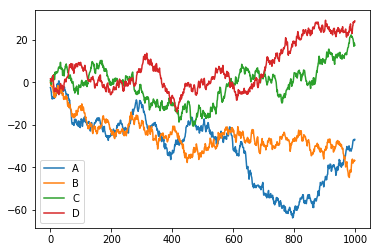

In [9]:
# 随机生成四组数据，分别画出来
data = pd.DataFrame(np.random.randn(1000, 4), index=np.arange(1000), columns=list('ABCD'))
data = data.cumsum()
data.plot()
plt.show()

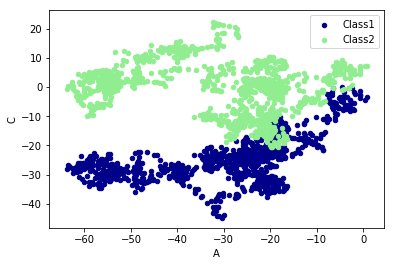

In [10]:
# scatter
ax = data.plot.scatter(x='A', y='B', color='DarkBlue', label='Class1')
data.plot.scatter(x='A', y='C', color='LightGreen', label='Class2', ax=ax)
plt.show()